In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv("product_will_buy.csv")
df
# df.isnull().sum()

,age,income,student,credit_rating,owns_house,num_purchases,will_buy
0,56,low,no,excellent,yes,3,0
1,46,low,no,fair,yes,1,0
2,32,medium,yes,fair,no,3,0
3,60,medium,yes,fair,yes,4,1
4,25,medium,no,fair,yes,2,0
...,...,...,...,...,...,...,...
795,43,high,no,fair,no,4,1
796,53,low,no,excellent,yes,1,0
797,18,low,no,fair,no,5,1
798,25,medium,no,fair,no,0,1


In [3]:
label=LabelEncoder()
df["age"]=label.fit_transform(df["age"])
df["income"]=label.fit_transform(df["income"])
df["student"]=label.fit_transform(df["student"])
df["credit_rating"]=label.fit_transform(df["credit_rating"])
df["owns_house"]=label.fit_transform(df["owns_house"])
df



,age,income,student,credit_rating,owns_house,num_purchases,will_buy
0,38,1,0,0,1,3,0
1,28,1,0,1,1,1,0
2,14,2,1,1,0,3,0
3,42,2,1,1,1,4,1
4,7,2,0,1,1,2,0
...,...,...,...,...,...,...,...
795,25,0,0,1,0,4,1
796,35,1,0,0,1,1,0
797,0,1,0,1,0,5,1
798,7,2,0,1,0,0,1


In [4]:
x=df.drop("will_buy",axis=1)
y=df["will_buy"]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [6]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [7]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1])

In [8]:
accuracy=accuracy_score(y_pred,y_test)
accuracy
print(f"accuracy score{accuracy*100:0.2f}%")

accuracy score80.62%


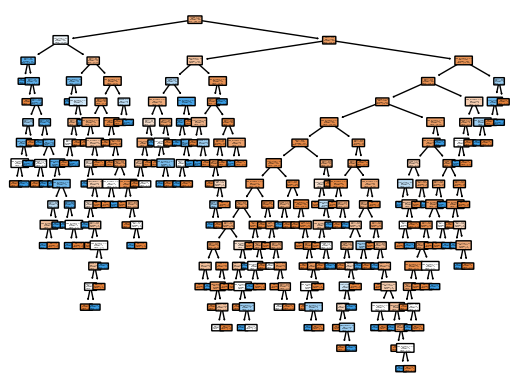

In [9]:
plot_tree(model,filled=True,rounded=True,feature_names=x.columns,class_names=["Not buy","buy"])
plt.show()

In [10]:
new_data=pd.DataFrame({"age":[40],"income":[1],"student":[0],"credit_rating":[0],"owns_house":[1],"num_purchases":[4]})
model.predict(new_data)

array([0])